# 1. 環境設定 

In [27]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

#pandas初期設定
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# 自作モジュールのインポート
sys.path.append('/home/ryo/KDD/000Python/mylibrary')
import basic_analytics as ba

# raw_dataディレクトリ
data_dir = "/home/ryo/Compe/000Kaggle/2017/PKDD2017/01rawdata/training"

# outputディレクトリ
out_dir = "/home/ryo/Compe/000Kaggle/2017/PKDD2017/03output"

# figure
fig_dir = out_dir + "/fig"

# データセット
ds_dir = "/home/ryo/Compe/000Kaggle/2017/PKDD2017/04ds"

# 出力をggplot風にする
plt.style.use('ggplot')
%matplotlib inline

height has been deprecated.



In [28]:
# 関数
## パーセンタイル
def p1(g):
    return np.percentile(g, 1)

def p25(g):
    return np.percentile(g, 25)

def p75(g):
    return np.percentile(g, 75)

def p99(g):
    return np.percentile(g, 99)

def parcent(df, var):
    _tmp = df.pivot_table(values = [var],
                          index = ['idplant','cid'],
                          aggfunc = [np.min,p1,p25,np.mean,np.median,p75,p99,np.max],
                          fill_value = 0)
    return(_tmp)

# 2. データ読込み 

In [29]:
os.chdir(ds_dir)
with open('bun_base_1.pickle','rb') as f01:
    bun_1 = pickle.load(f01)

# 3. Data Viz 

In [30]:
bun_1.head()

,idplant,day,cid,plant_power,norm_plant_power,plant_irradiance,plant_temperature,weather_cloudcover,weather_pressure,weather_windspeed,weather_dewpoint,weather_temperature,weather_humidity,weather_windbearing
0,1,2012-01-02,2,0,0.000000,0,4,0.31,1023.07,1.73,5.45,10,0.56,202
1,1,2012-01-03,2,11,0.000012,73,7,0.55,0.00,1.48,3.91,0,0.89,237
2,1,2012-01-04,2,0,0.000000,0,4,0.14,1022.46,2.13,4.86,0,0.87,228
3,1,2012-01-05,2,428,0.000484,587,17,0.17,0.00,2.94,4.48,0,0.87,267
4,1,2012-01-06,2,0,0.000000,0,7,0.44,0.00,3.86,6.99,0,0.90,176


In [34]:
bun_1.describe()

,idplant,cid,plant_power,norm_plant_power,plant_irradiance,plant_temperature,weather_cloudcover,weather_pressure,weather_windspeed,weather_dewpoint,weather_temperature,weather_humidity,weather_windbearing
count,20843.000000,20843.000000,20843.000000,20843.000000,20843.000000,20843.000000,20843.000000,20843.000000,20843.000000,20843.000000,20843.000000,20843.000000,20843.000000
mean,2.000912,11.000000,262.738233,0.000297,234.563307,17.646932,0.306104,992.012621,3.558629,10.121800,10.550832,0.672364,215.793840
std,0.816330,5.477357,9043.876920,0.010218,318.230764,11.371923,0.226359,146.822518,2.133813,6.020018,11.323405,0.177280,105.563798
min,1.000000,2.000000,0.000000,0.000000,0.000000,-3.000000,0.000000,0.000000,0.000000,-7.180000,-2.000000,0.210000,0.000000
25%,1.000000,6.000000,0.000000,0.000000,0.000000,9.000000,0.140000,1010.000000,2.070000,5.810000,0.000000,0.520000,145.000000
50%,2.000000,11.000000,43.000000,0.000049,36.000000,17.000000,0.310000,1013.360000,3.080000,10.760000,8.000000,0.690000,236.000000
75%,3.000000,16.000000,320.000000,0.000362,422.500000,26.000000,0.380000,1017.220000,4.560000,14.800000,20.000000,0.830000,308.000000
max,3.000000,20.000000,885124.000000,1.000000,1337.000000,52.000000,1.000000,1032.420000,24.100000,25.570000,36.000000,1.000000,359.000000


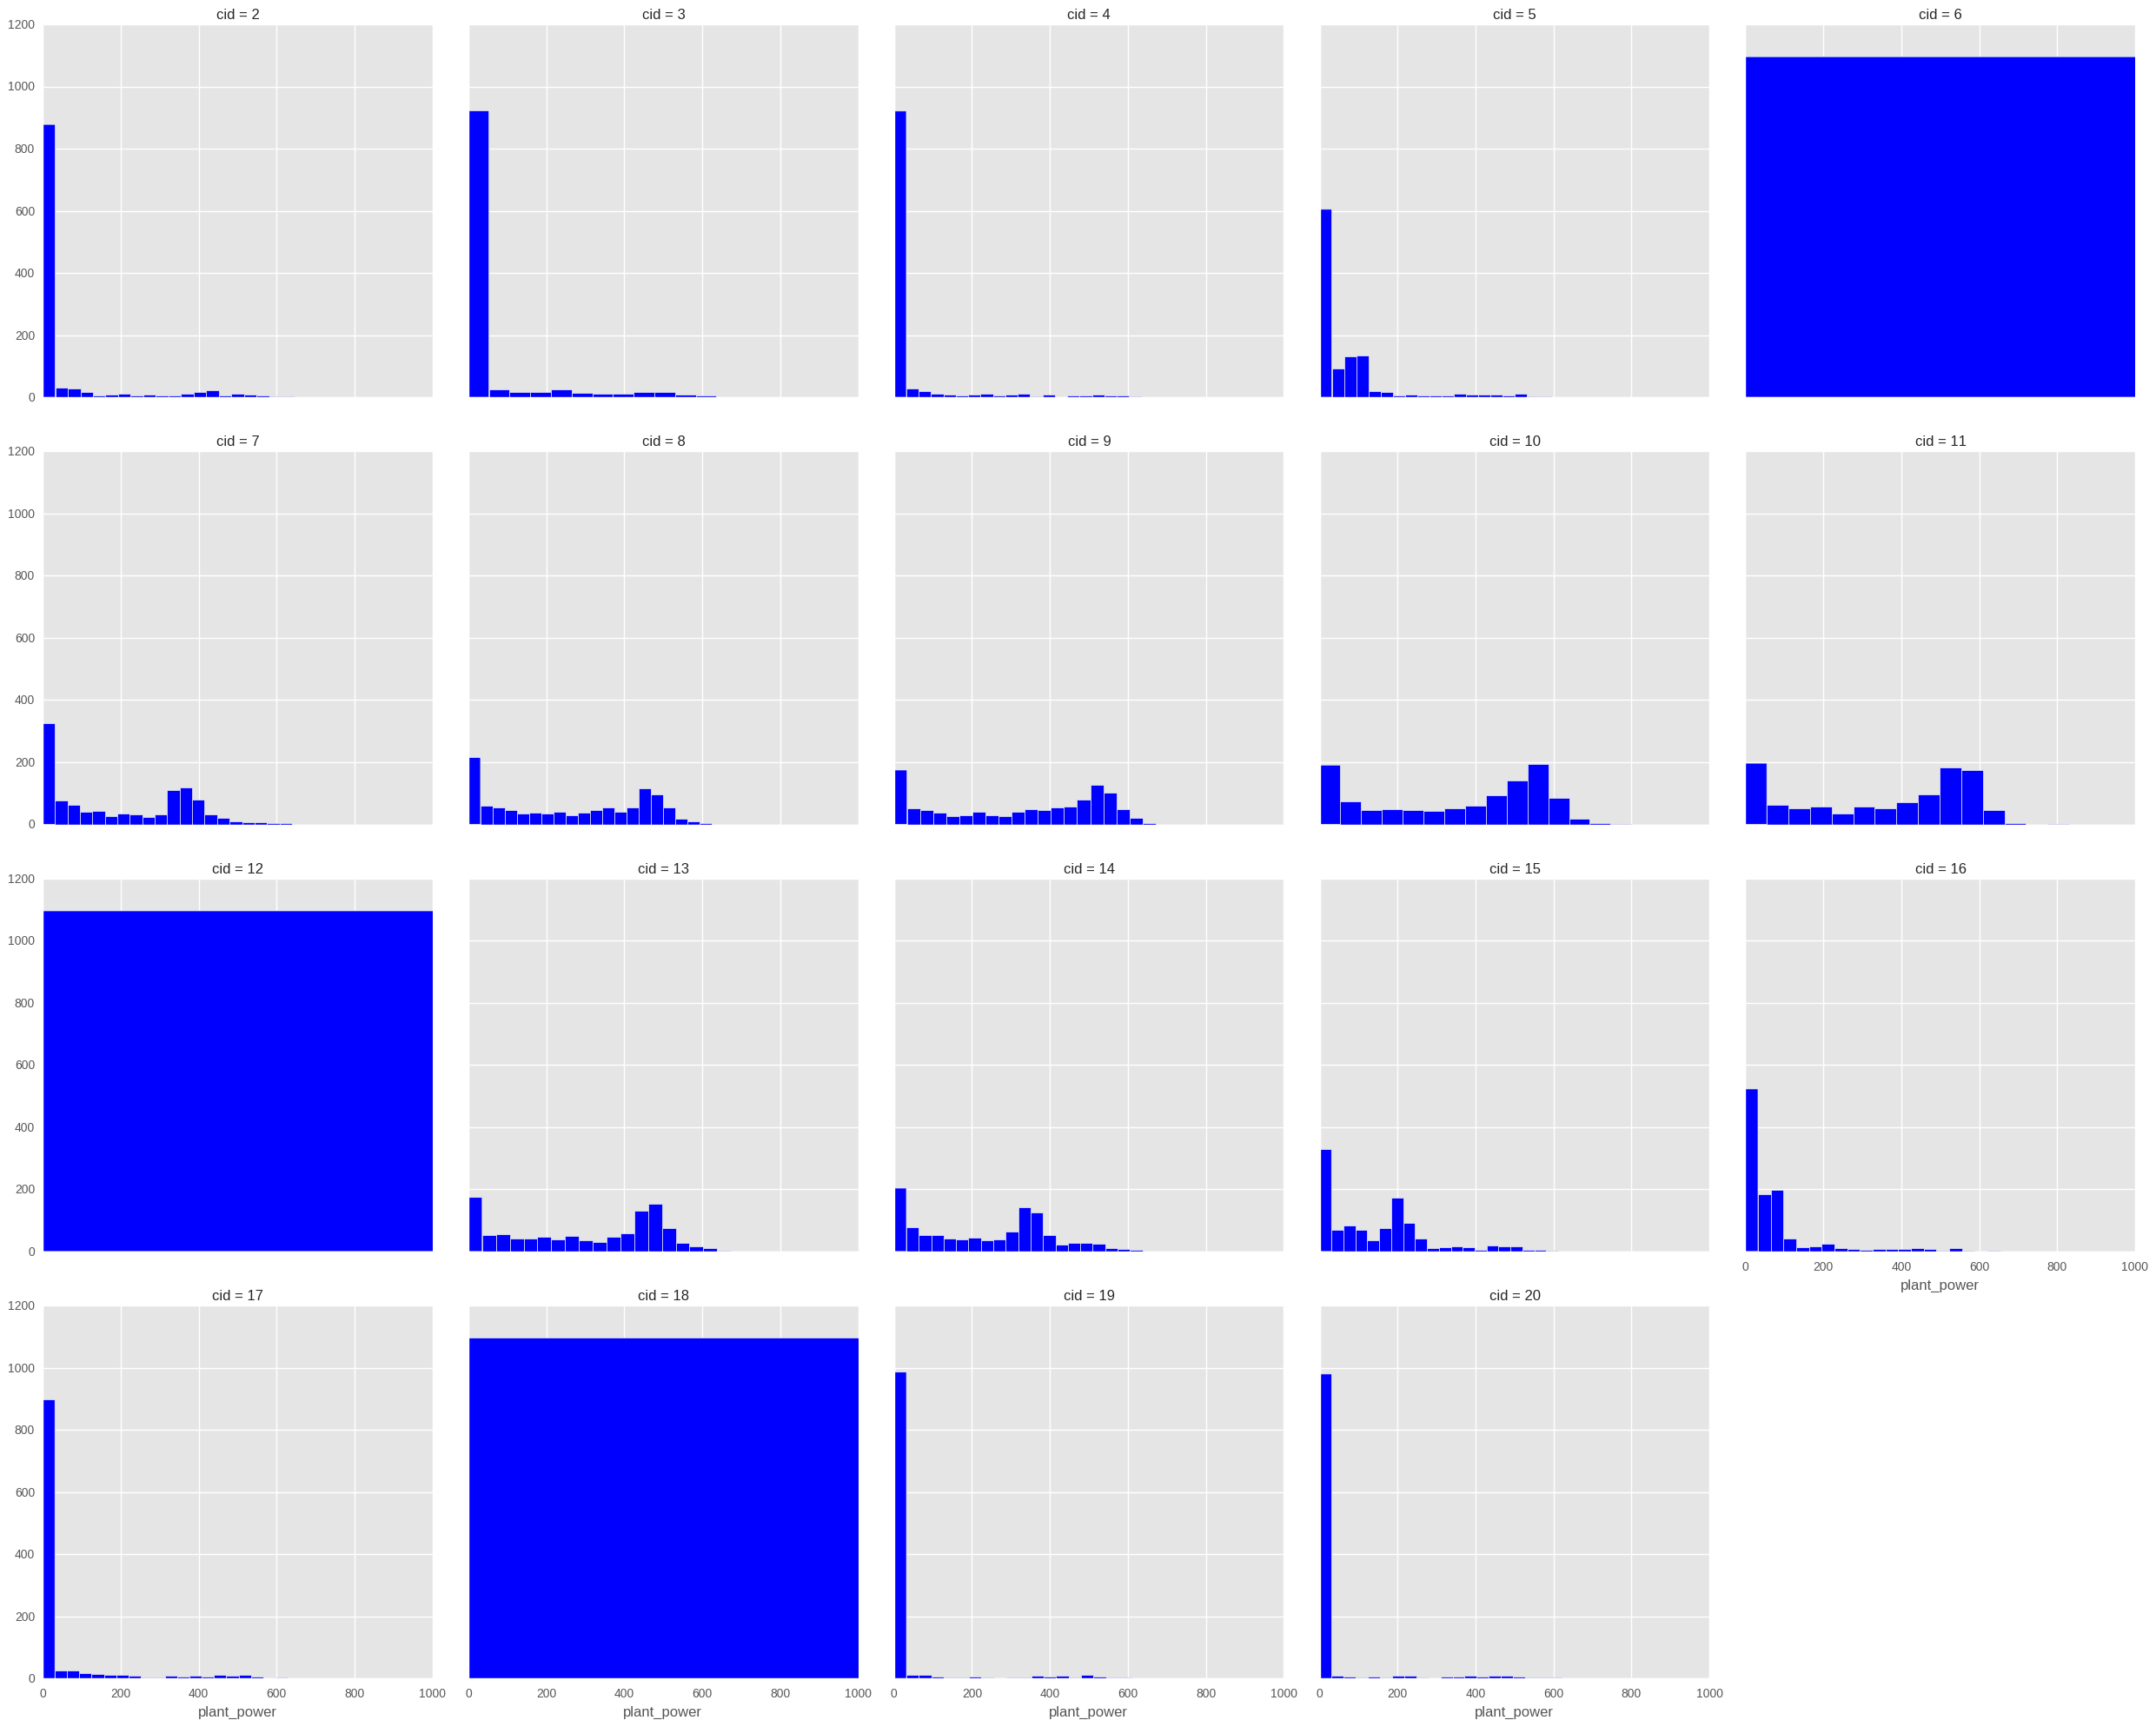

In [6]:
import matplotlib.ticker as tkr
g = sns.FacetGrid(bun_1, col='cid', col_wrap=5, size=5)
g = g.map(plt.hist, "plant_power", bins=20, color="Blue").set(xlim=(0,1000))

In [31]:
#parcentile
parcent(bun_1,'plant_power')

amin          p1         p25         mean      median         p75         p99        amax
            plant_power plant_power plant_power  plant_power plant_power plant_power plant_power plant_power
idplant cid                                                                                                 
1       2             0           0        0.00    28.794521         0.0        0.00      485.08         572
        3             0           0        0.00    31.090411         0.0        0.00      475.32         515
        4             0           0        0.00    31.317808         3.0       19.00      384.16         494
        5             0           0        0.00    65.660274        47.0       90.00      487.08         547
        6             0           0        3.00   135.265753       152.0      220.00      478.32         531
        7             0           0       43.00   215.923288       252.0      353.00      471.52         549
        8             0           0       89.00   283.969863       344.0      449.00      525.04         551
        9             0           0      135.00   337.016438       428.0      514.00      579.00         605
        10            0           0      136.00   354.627397       446.0      539.00      604.72         704
        11            0           0      113.00   344.084932       431.0      540.00      599.88         620
        12            0           0      125.00   329.090411       409.0      514.00      571.52         591
        13            0           0      116.00   286.567123       364.0      448.00      508.32         550
        14            0           0       85.00   229.802740       286.0      348.00      523.60         558
        15            0           0       29.00   131.416438       143.0      208.00      459.24         543
        16            0           0        3.00    57.600000        42.0       83.00      441.72         510
        17            0           0        0.00    39.008219         5.0       19.00      510.36         544
        18            0           0        0.00    24.473973         0.0        0.00      500.76         575
        19            0           0        0.00    24.863014         0.0        0.00      492.76         548
        20            0           0        0.00    22.964384         0.0        0.00      486.24         546
2       2             0           0        0.00    61.549180         0.0        6.50      544.40         623
        3             0           0        0.00    58.948087         0.0        0.00      535.80        1060
        4             0           0        0.00    49.950820         0.0       19.00      530.45         574
        5             0           0        0.00    70.013661         6.5       90.75      522.45         554
        6             0           0        0.00  2468.060109        44.5      213.00      532.05      862004
        7             0           0       18.00   183.046448       147.0      342.75      522.35         579
        8             0           0       56.00   248.483607       249.0      439.75      526.55         565
        9             0           0      101.25   308.893443       344.0      496.50      578.40         638
        10            0           0      123.00   337.297814       384.0      525.00      614.15        1066
        11            0           0      133.25   339.505464       402.5      528.00      602.05         777
        12            0           0      122.25   321.691257       338.0      519.75      593.10        1085
        13            0           0      121.00   290.336066       319.5      458.75      555.80         607
        14            0           0       60.50   220.120219       234.5      346.75      535.45         583
        15            0           0       16.25   137.707650       109.5      206.75      526.30         595
        16            0           0        0.00    69.497268        31.0       82.00      515.1

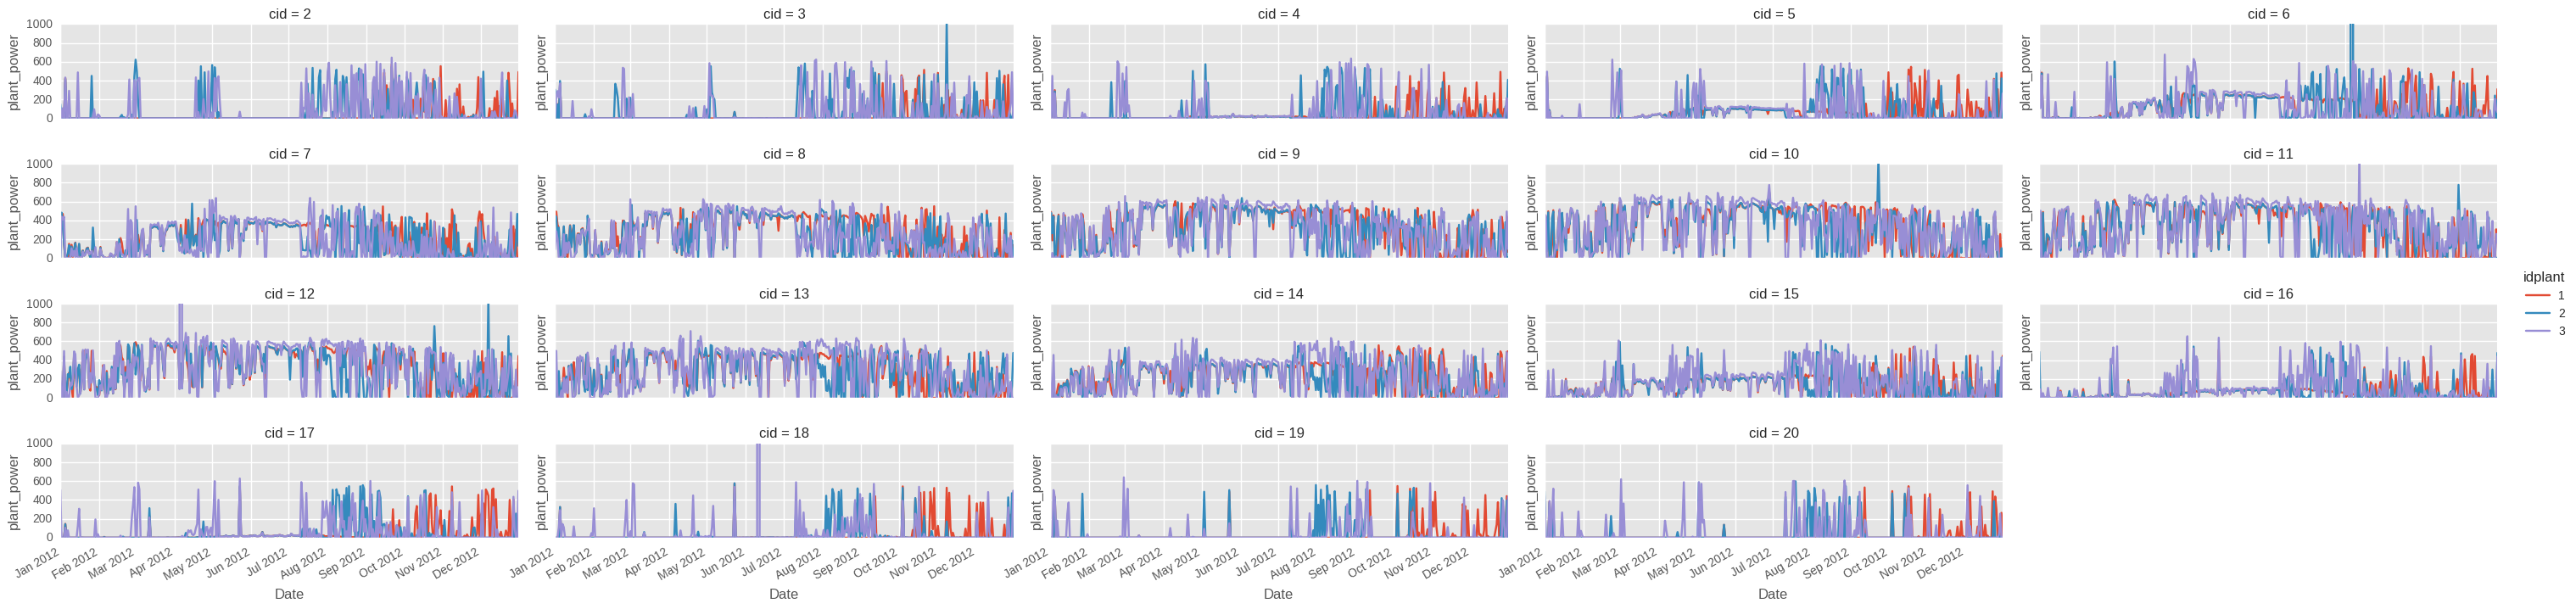

In [8]:
# time series
g = sns.FacetGrid(bun_1, hue='idplant', col='cid', col_wrap=5, size=2, aspect=3)
g.map(plt.plot, 'day', 'plant_power').add_legend()
g.set(ylim = [0,1000],
         xlabel='Date',
         ylabel='plant_power')
g.fig.autofmt_xdate()

#保存
os.chdir(fig_dir)
sns.plt.savefig('time_line.png')

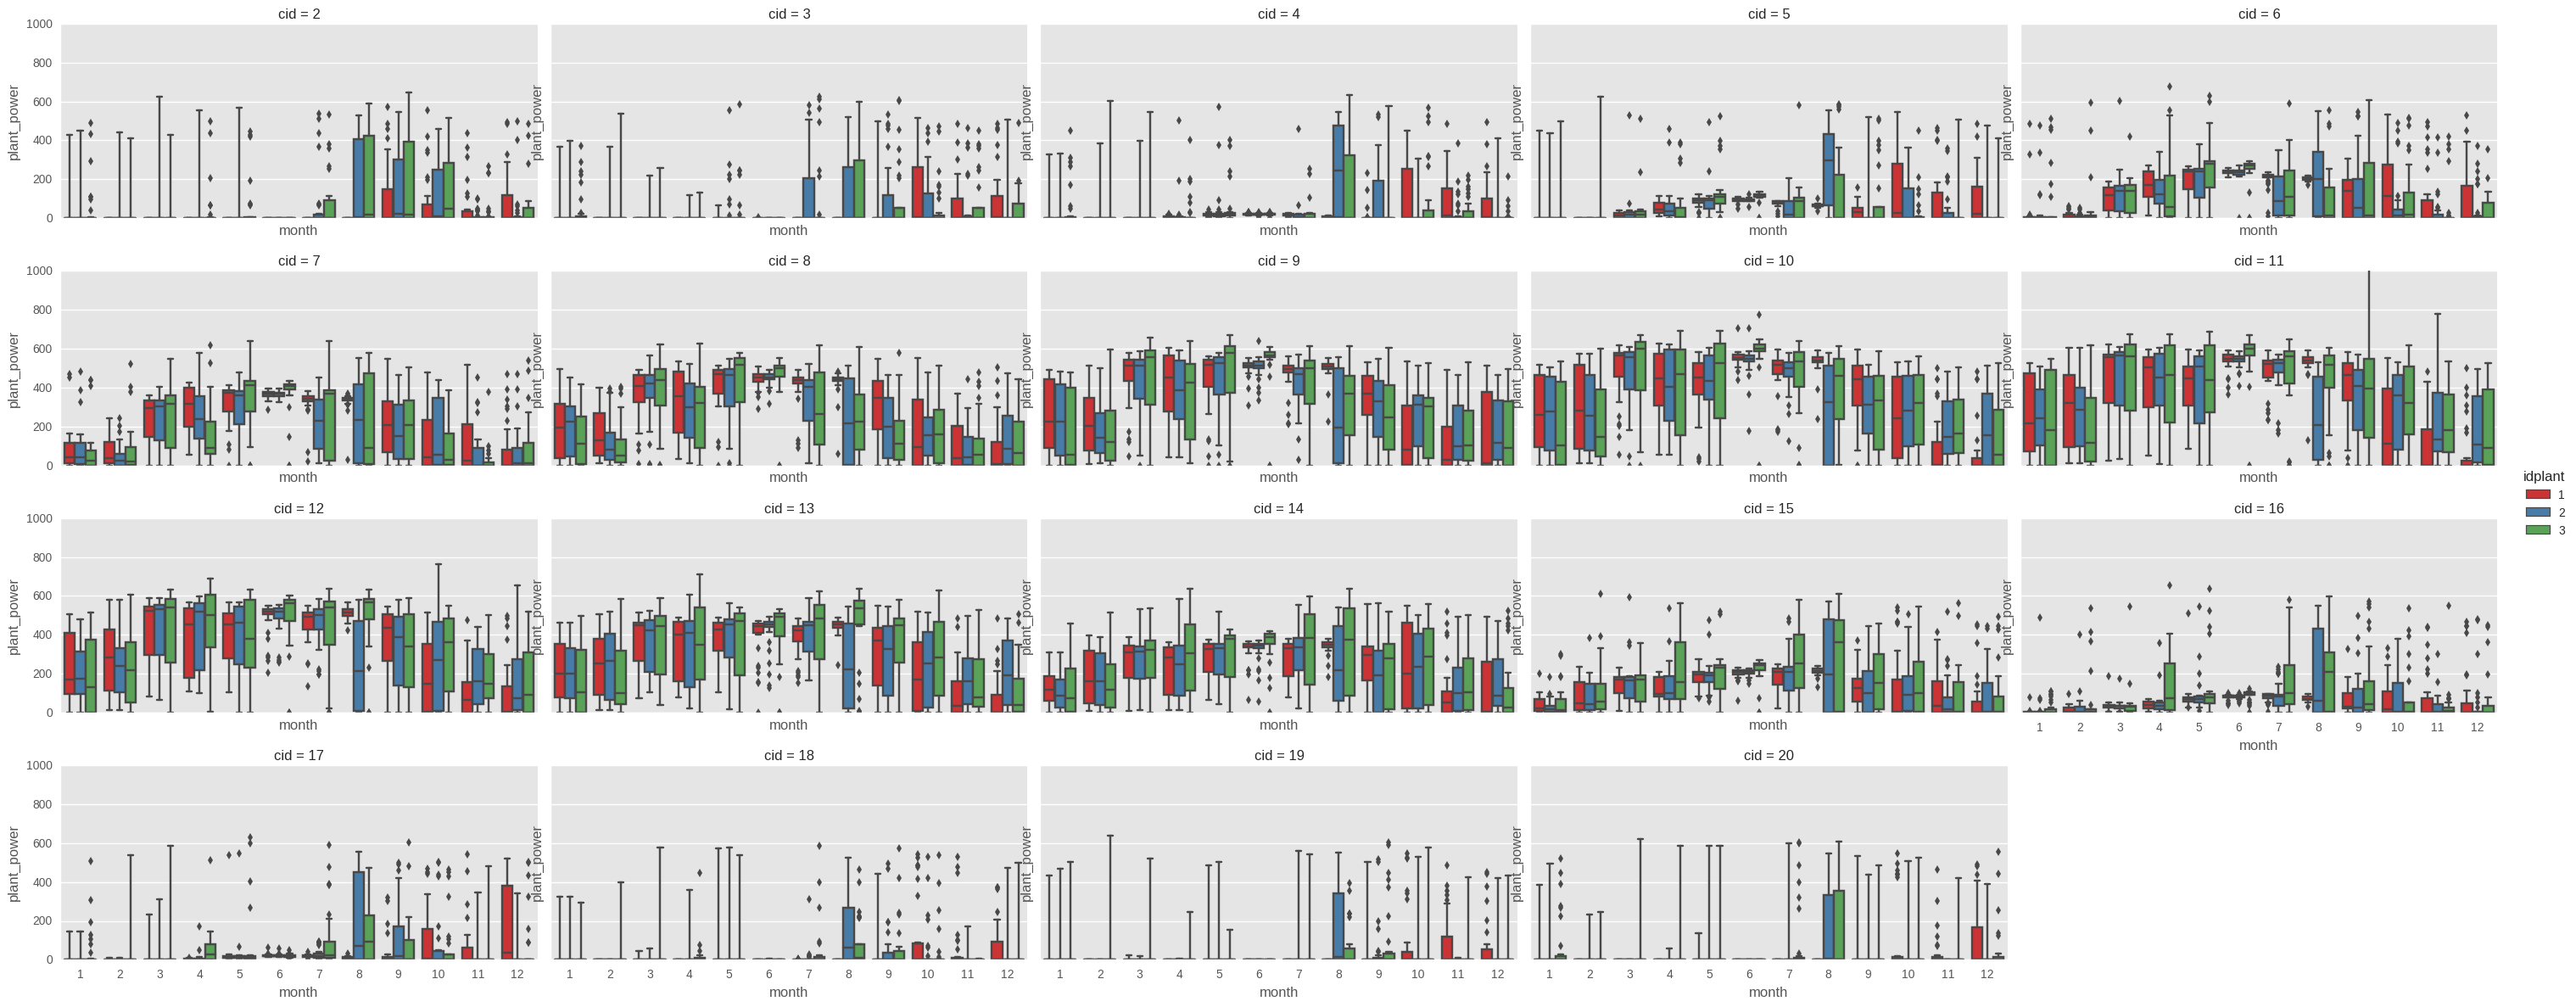

In [24]:
# boxplot
bun_1['month'] = bun_1['day'].map(lambda x: x.month)
g = sns.FacetGrid(bun_1, col="cid", col_wrap=5, size=3, aspect=2)
g.map(sns.boxplot, "month", "plant_power", "idplant", palette="Set1").add_legend(title="idplant")
g.set(ylim = [0,1000],
      xlabel='month',
      ylabel='plant_power')

#保存
os.chdir(fig_dir)
sns.plt.savefig('boxplot_power.png')

In [35]:
# 相関行列 - ヒートマップ
## 前処理
coln = ['idplant', 'cid', 'plant_power', 'norm_plant_power', 'plant_irradiance', 'plant_temperature', 'weather_cloudcover',
        'weather_pressure', 'weather_windspeed', 'weather_dewpoint', 'weather_temperature', 'weather_humidity', 
        'weather_windbearing','month']
corr_base_1 = bun_1.loc[:,coln]

## 相関行列の生成 
corr = corr_base_1.corr()

In [36]:
corr

,idplant,cid,plant_power,norm_plant_power,plant_irradiance,plant_temperature,weather_cloudcover,weather_pressure,weather_windspeed,weather_dewpoint,weather_temperature,weather_humidity,weather_windbearing,month
idplant,1.000000e+00,3.354802e-18,0.008822,0.008822,0.017774,-0.042445,0.003748,-0.000104,-0.001214,-0.001186,-0.000890,-0.002007,-0.000367,NaN
cid,3.354802e-18,1.000000e+00,-0.001649,-0.001649,-0.043301,0.038666,0.053767,0.095409,0.018126,0.051292,0.460457,-0.123153,-0.132958,NaN
plant_power,8.821534e-03,-1.648691e-03,1.000000,1.000000,0.023744,0.011050,-0.002934,0.002803,-0.009089,0.008224,0.004859,-0.016374,-0.010324,NaN
norm_plant_power,8.821534e-03,-1.648691e-03,1.000000,1.000000,0.023744,0.011050,-0.002934,0.002803,-0.009089,0.008224,0.004859,-0.016374,-0.010324,NaN
plant_irradiance,1.777427e-02,-4.330144e-02,0.023744,0.023744,1.000000,0.575828,-0.204405,0.067557,0.007330,0.196970,0.120913,-0.375711,-0.120139,NaN
plant_temperature,-4.244490e-02,3.866637e-02,0.011050,0.011050,0.575828,1.000000,-0.343531,0.124233,-0.162481,0.749890,0.365970,-0.502309,-0.240515,NaN
weather_cloudcover,3.747876e-03,5.376667e-02,-0.002934,-0.002934,-0.204405,-0.343531,1.000000,-0.029182,0.164454,-0.197092,-0.062711,0.364704,0.002786,NaN
weather_pressure,-1.036776e-04,9.540886e-02,0.002803,0.002803,0.067557,0.124233,-0.029182,1.000000,-0.000255,0.130524,0.134605,-0.139670,-0.044573,NaN
weather_windspeed,-1.214006e-03,1.812614e-02,-0.009089,-0.009089,0.007330,-0.162481,0.164454,-0.000255,1.000000,-0.214148,0.058744,-0.129282,0.164516,NaN
weather_dewpoint,-1.185893e-03,5.129161e-02,0.008224,0.008224,0.196970,0.749890,-0.197092,0.130524,-0.214148,1.000000,0.379033,-0.159879,-0.248545,NaN


/home/ryo/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


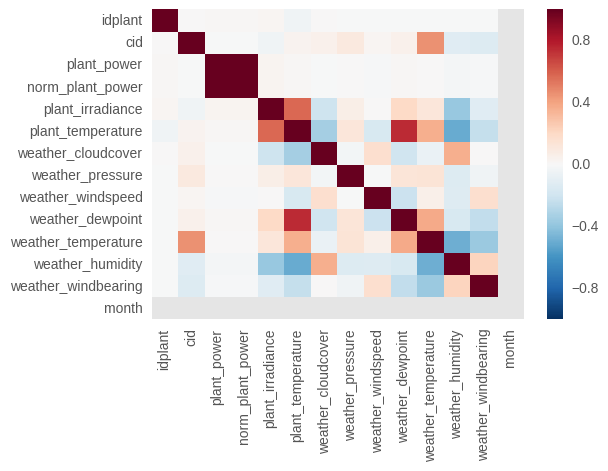

In [37]:
## 可視化
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

一見、他の変数と相関関係がないようにみえる

/home/ryo/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


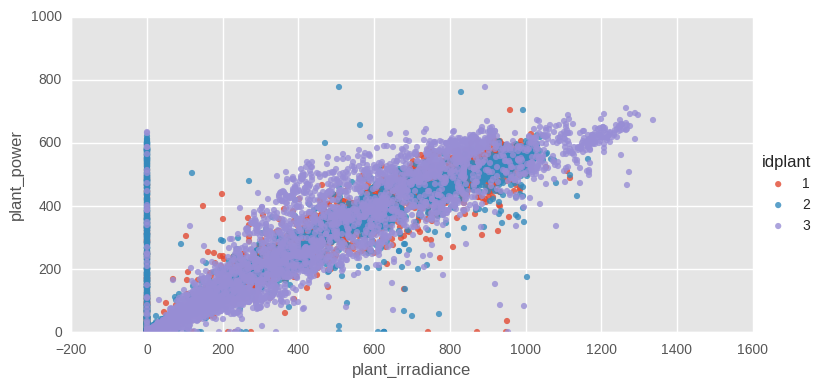

In [7]:
# scatter plot
g = sns.lmplot(x='plant_irradiance', y='plant_power', hue='idplant', data=bun_1, fit_reg = False,
              size=4, aspect=2)
g.set(ylim = [0,1000],
      xlabel='plant_irradiance',
      ylabel='plant_power')

/home/ryo/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


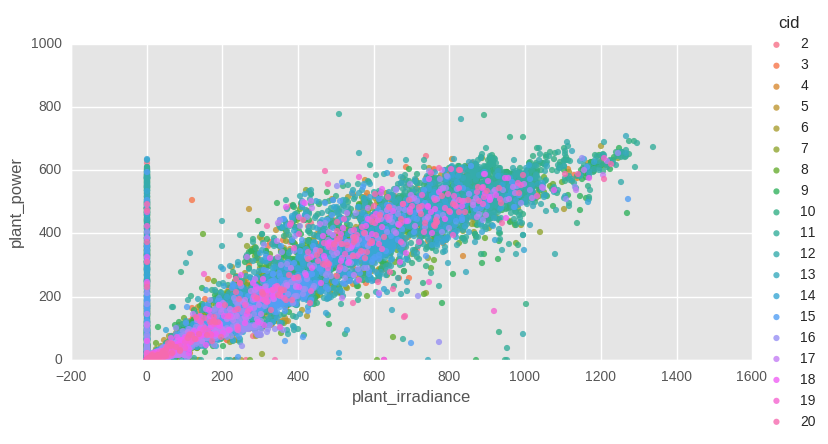

In [45]:
# scatter plot
g = sns.lmplot(x='plant_irradiance', y='plant_power', hue='cid', data=bun_1, fit_reg = False,
              size=4, aspect=2)
g.set(ylim = [0,1000],
      xlabel='plant_irradiance',
      ylabel='plant_power')

/home/ryo/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


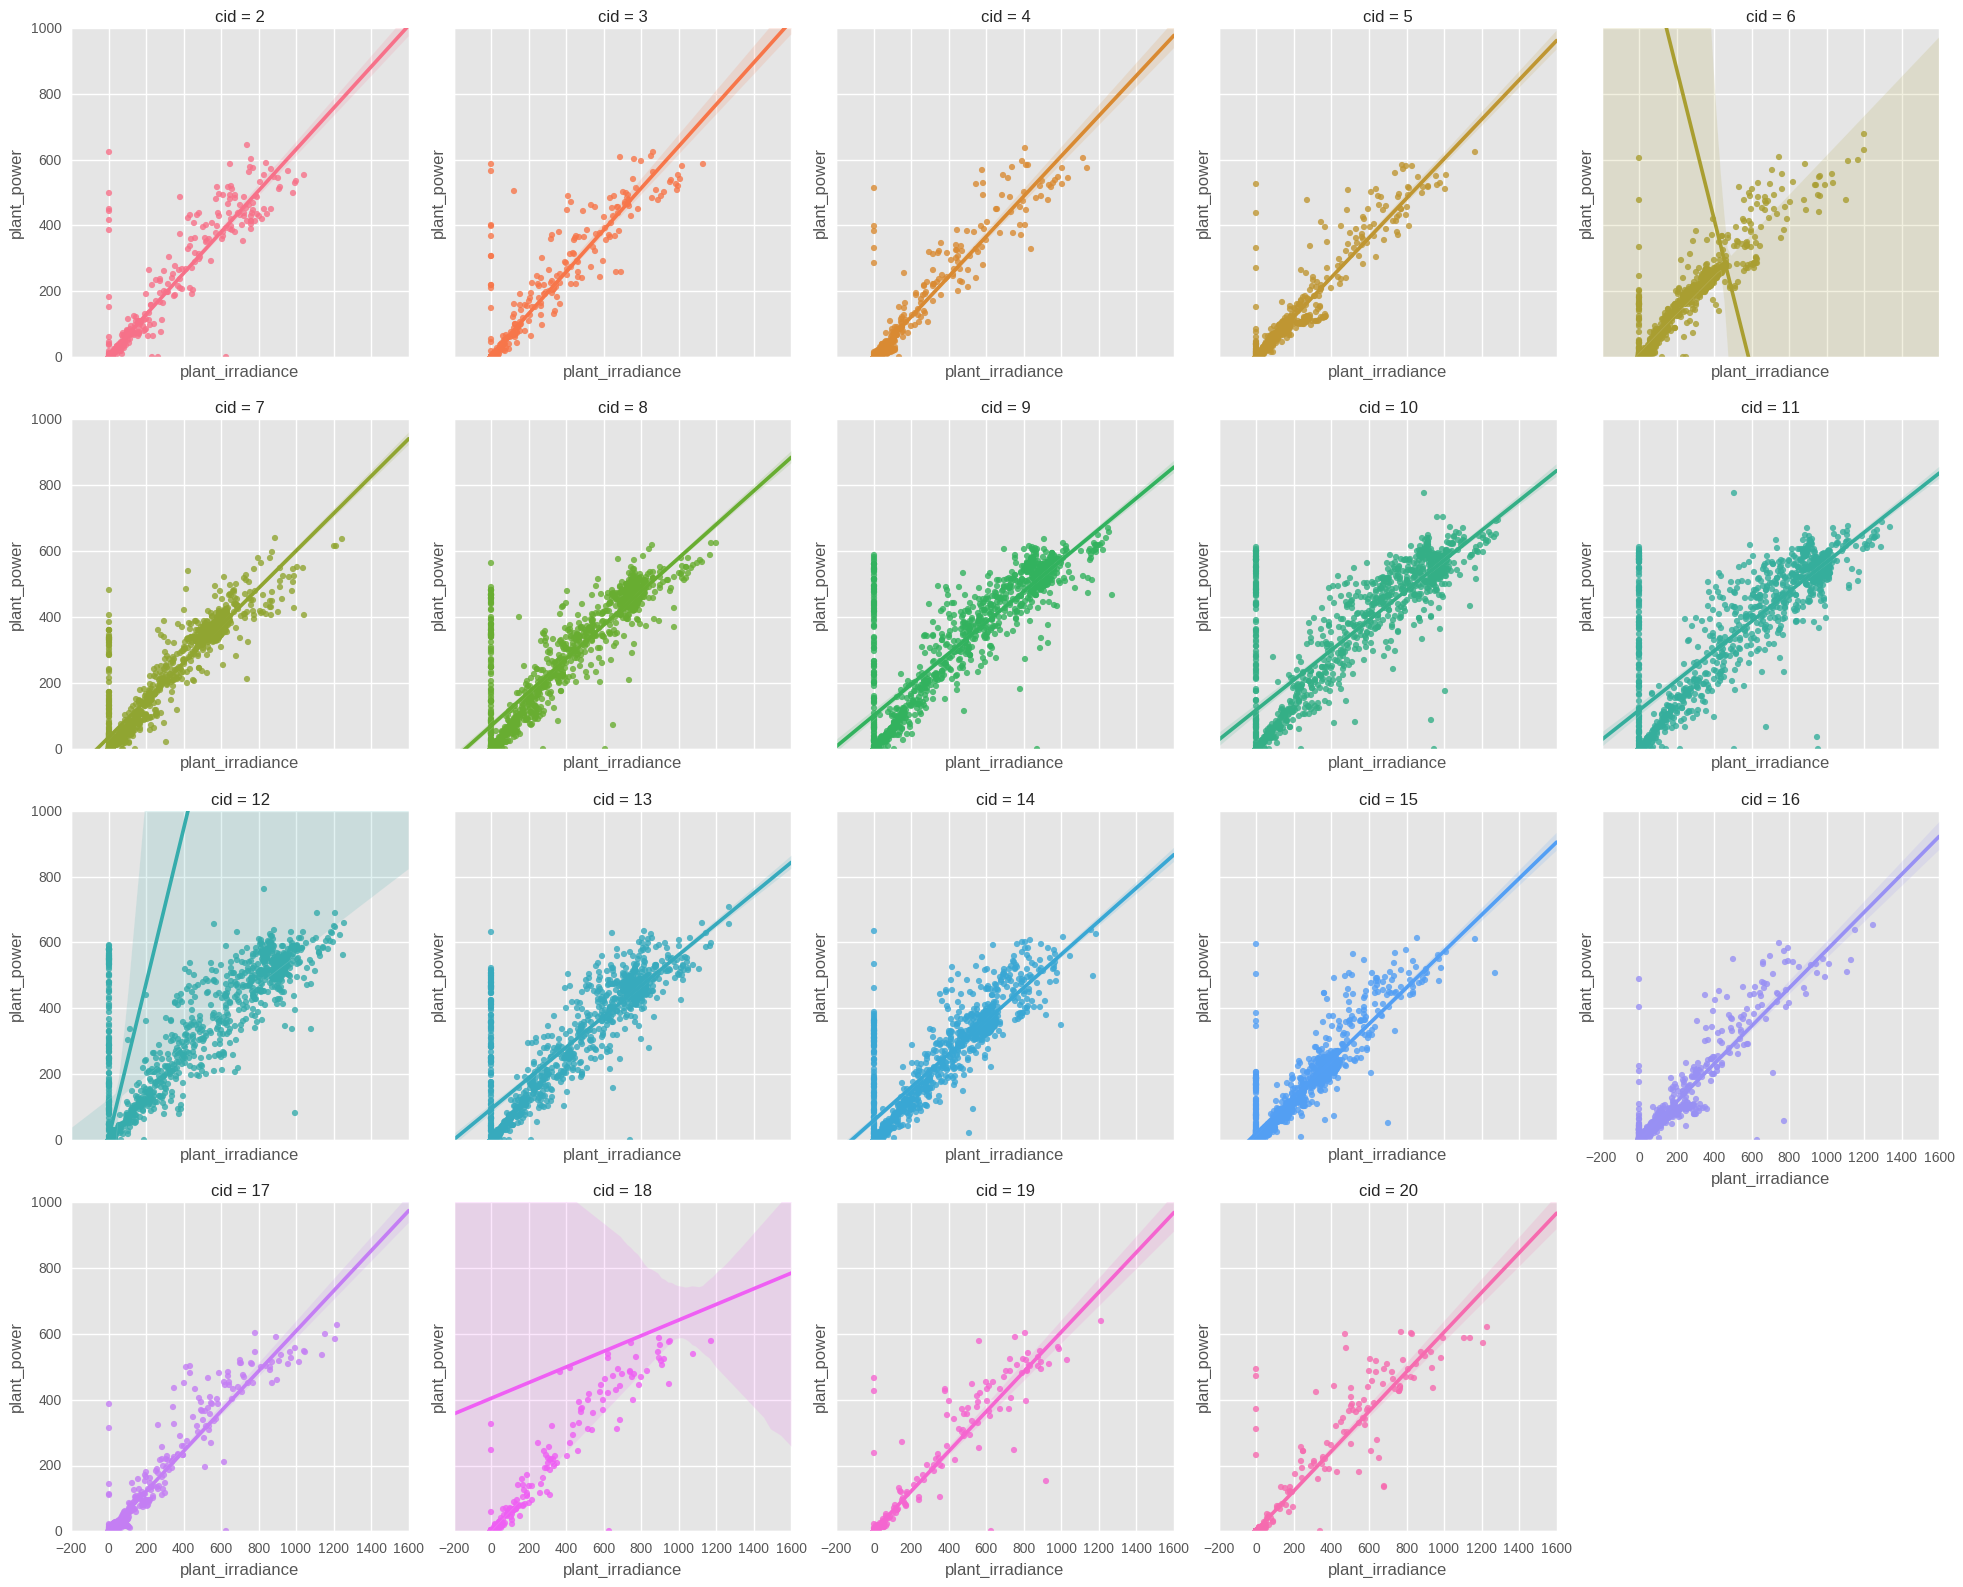

In [47]:
g = sns.lmplot(x='plant_irradiance', y='plant_power', hue='cid', data=bun_1,
           col='cid',col_wrap=5, size=4, aspect=1)
g.set(ylim = [0,1000],
      xlabel='plant_irradiance',
      ylabel='plant_power')  
plt.show(g)

In [24]:
# 散布図を描く関数を定義
def multi_scatter(df, var):
    g = sns.lmplot(x=var, y='plant_power', hue='idplant', data=df,
               col='idplant',col_wrap=3, size=4, aspect=1)
    g.set(ylim = [0,1000],
          xlabel=var,
          ylabel='plant_power')  
    plt.show(g)

/home/ryo/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


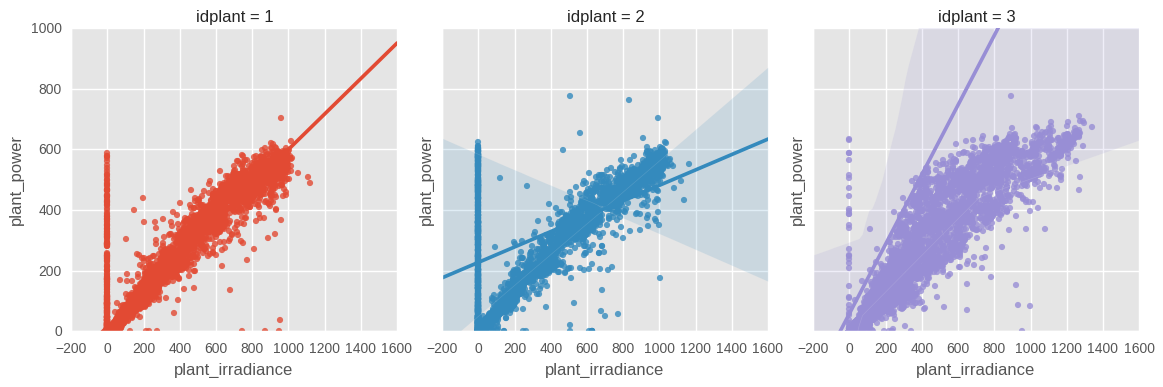

In [25]:
# plant_power
multi_scatter(bun_1,'plant_irradiance')

/home/ryo/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


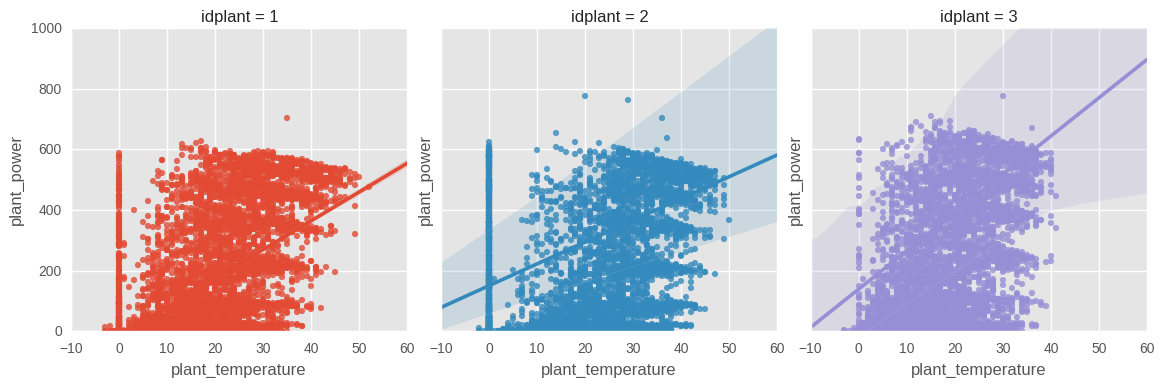

In [26]:
# plant_temperature
multi_scatter(bun_1,'plant_temperature')

/home/ryo/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


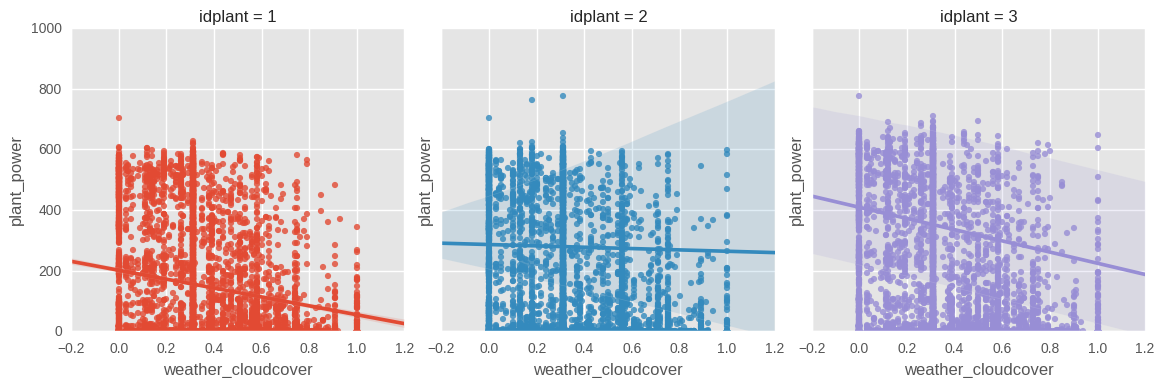

In [38]:
# weather_cloudcover
multi_scatter(bun_1,'weather_cloudcover')

/home/ryo/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


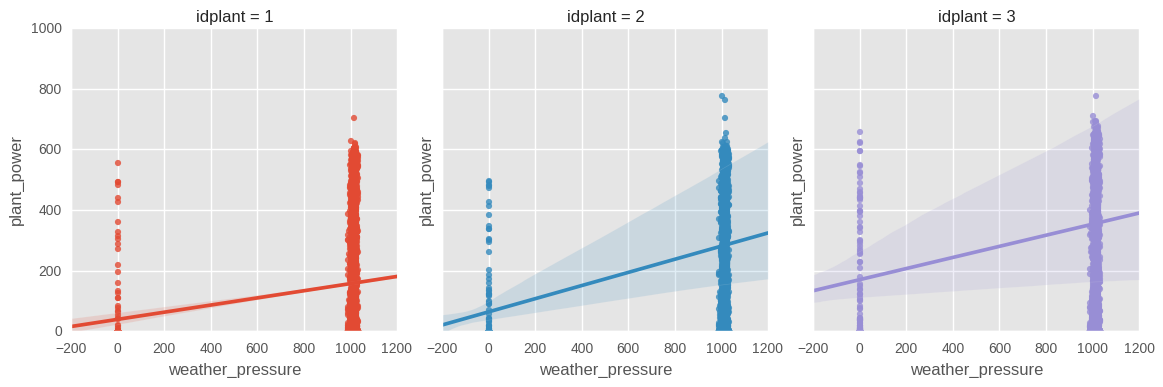

In [39]:
# weather_pressure
multi_scatter(bun_1,'weather_pressure')

/home/ryo/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


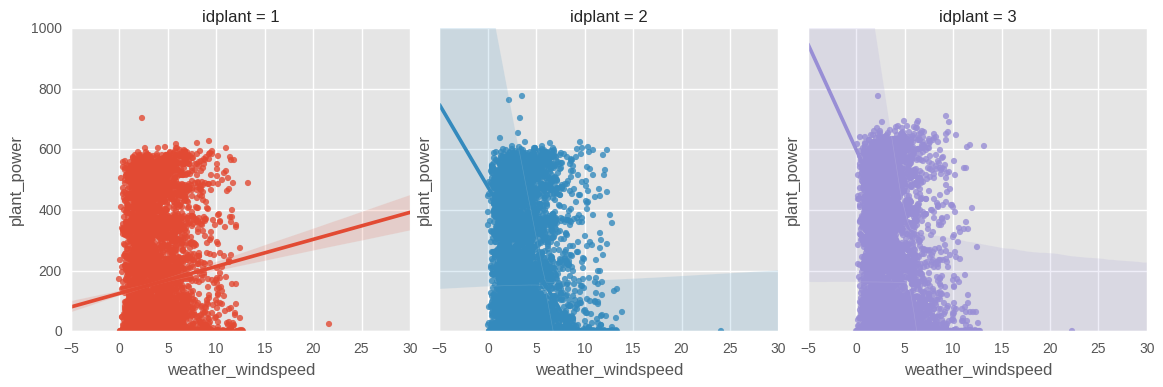

In [40]:
# weather_windspeed
multi_scatter(bun_1,'weather_windspeed')

/home/ryo/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


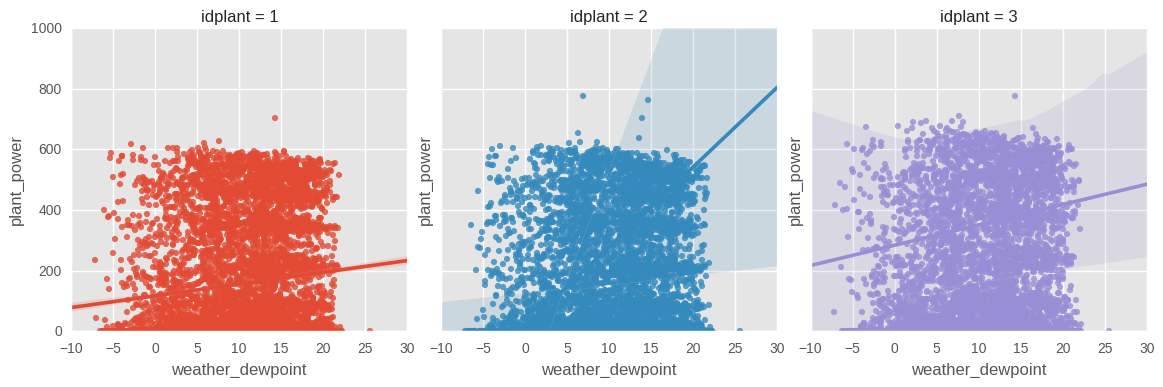

In [41]:
# weather_dewpoint
multi_scatter(bun_1,'weather_dewpoint')

/home/ryo/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


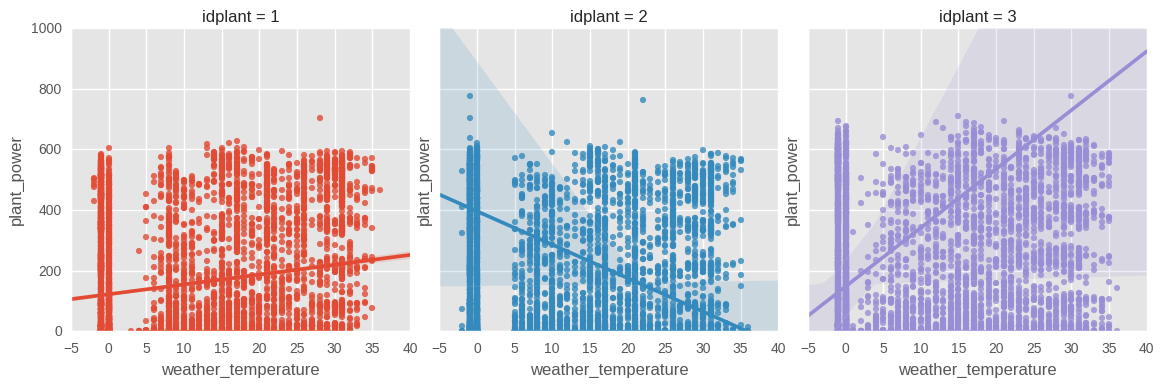

In [42]:
# weather_temperature
multi_scatter(bun_1,'weather_temperature')

/home/ryo/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


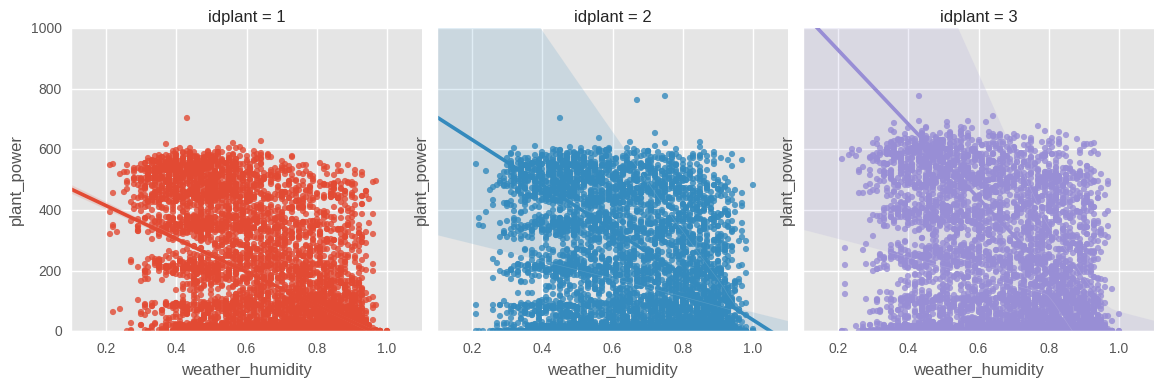

In [43]:
# weather_humidity
multi_scatter(bun_1,'weather_humidity')

/home/ryo/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


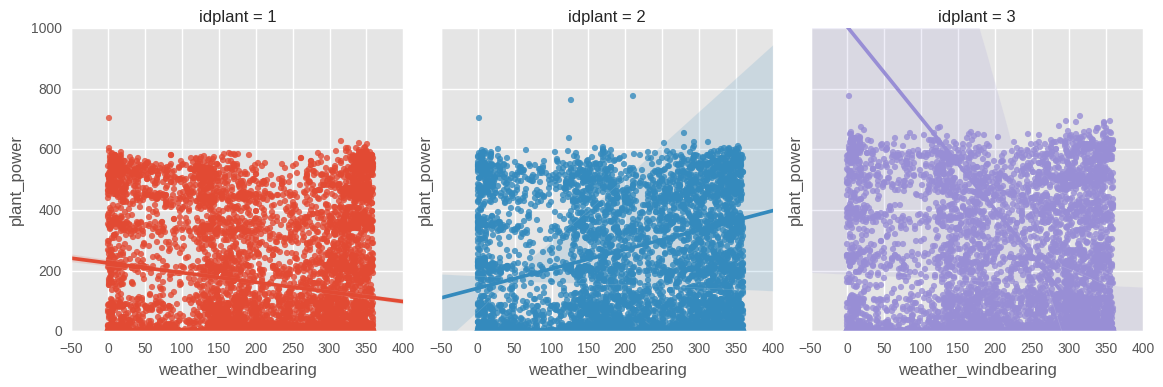

In [44]:
# weather_windbearing
multi_scatter(bun_1,'weather_windbearing')